# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [1]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 ' 68 11645   68  7974    0     0  25826      0 --:--:-- --:--:-- --:--:-- 25805',
 '100 11645  100 11645    0     0  37143      0 --:--:-- --:--:-- --:--:-- 37085']

In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [20]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return sum([x * y for x, y in zip(array1, array2)])


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return  1/(1+math.exp(-x))

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model
    return  sigmoid(dot_product(weights, instance[:-1]))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return  1 if output(weights,instance) >=0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #Intialize the weights to zero
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:

            #Compute weighted sum (input to the activation function)
            in_value = dot_product(weights, instance)

            #Apply activation function (sigmoid)
            output = sigmoid(in_value)

            #Compute error (difference between actual and predicted output)
            error = instance[-1] - output

            #Update weights using gradient descent
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [4]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [16]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    accs = []
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      accs.append(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
    print(*accs , sep='\n')

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:  20, learning rate: 

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)

A. No , since we are getting the highest accuracy at the following points
The experiments showed that when using the listed conditions an accuracy of 85.7% emerged as the peak result .

Training Size: 300 samples
Number of Epochs: 100
Learning Rate: 0.010
The combination of an ideal training dataset subset with a specifically selected learning rate helps reach maximum test accuracy results which is less than the full training dataset.

B.  The second run displays poor accuracy because of both reduced learning rate and early termination whileUpdating the model weights at 0.005 produces slower adjustment requiring additional time for convergence and suboptimal performance and in addition the restricted epochs to 20. The model performed poorly with few training iterations because it needed additional training on a larger dataset although the learning rate was set to a minimal value.

C. Higher accuracy than 80% can be reached by applying better optimization techniques to hyperparameter settings. You should experiment with Adam optimizer followed by early stopping with appropriate methods of weight initialization like Xavier or He initialization to boost convergence rates.

D. The additional training of more epochs might hurt performance because it induces excessive fitting of training data which harms generalization effectiveness. Learning rate decay together with early stopping and regularization techniques calms training operations while enhancing the accuracy of model tests.

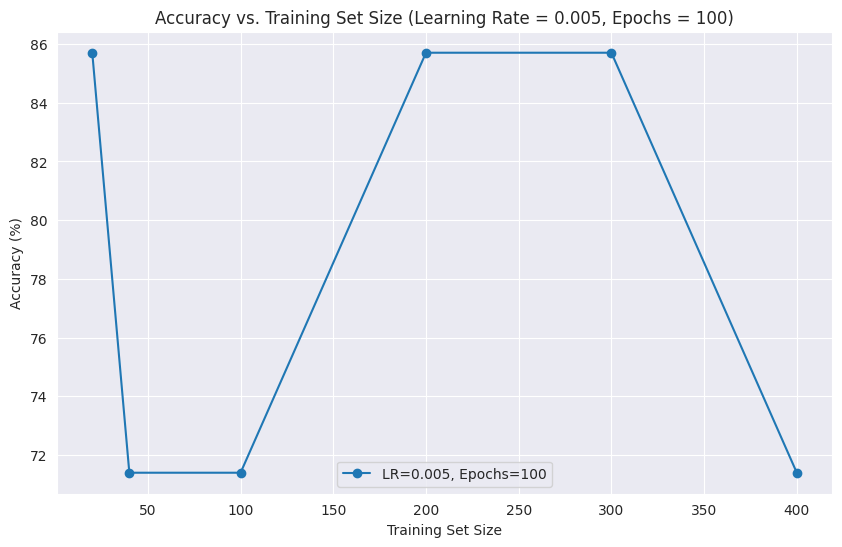

In [14]:
import matplotlib.pyplot as plt

# Example data (replace with your actual results)
training_sizes = [20, 40, 100, 200, 300, 400]
learning_rate = 0.005
epochs = 100

# Accuracy data for learning rate = 0.005, epochs = 100 (Replace with your actual accuracy values)
accuracy_data = {
    (20, 100, 0.005): 85.7,
    (40, 100, 0.005): 71.4,
    (100, 100, 0.005): 71.4,
    (200, 100, 0.005): 85.7,
    (300, 100, 0.005): 85.7,
    (400, 100, 0.005): 71.4
}

# Extract accuracy values for each training size at fixed epochs and learning rate
accuracy_values = [accuracy_data[(size, epochs, learning_rate)] for size in training_sizes]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, accuracy_values, marker='o', label=f'LR={learning_rate}, Epochs={epochs}')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Training Set Size (Learning Rate = 0.005, Epochs = 100)')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# adding a new parameter
import math
import itertools
import re

# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    return sum([x * y for x, y in zip(array1, array2)])


def sigmoid(x):
    return 1 / (1 + math.exp(-x))


def output(weights, instance):
    return sigmoid(dot_product(weights, instance[:-1]))


def predict(weights, instance):
    return 1 if output(weights, instance) >= 0.5 else 0


def get_accuracy(weights, instances):
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0 for instance in instances])
    return correct * 100 / len(instances)


def train_perceptron(instances, lr, epochs, momentum=0.9):
    weights = [0] * (len(instances[0]) - 1)
    velocity = [0] * (len(instances[0]) - 1)  # Initialize velocity for momentum

    for _ in range(epochs):
        for instance in instances:
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output

            for i in range(len(weights)):
                gradient = lr * error * output * (1 - output) * instance[i]
                velocity[i] = momentum * velocity[i] + gradient
                weights[i] += velocity[i]

    return weights

# Example usage
if __name__ == "__main__":
    # Load data
    train_data = read_data("train.dat")
    test_data = read_data("test.dat")

    # Train perceptron
    final_weights = train_perceptron(
        instances=train_data,
        lr=0.19999,        # Learning rate
        epochs=50,     # Number of training passes
        momentum=0.9   # Momentum term
    )

    # Evaluate
    print(f"Train accuracy: {get_accuracy(final_weights, train_data):.1f}%")
    print(f"Test accuracy: {get_accuracy(final_weights, test_data):.1f}%")


Train accuracy: 85.0%
Test accuracy: 71.4%
